<a href="https://colab.research.google.com/github/art-glazunov/MegaFon_RecSys_Workshop/blob/main/Part_1_Load%2C_join%2C_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MegaFon RecSys workshop
by Artyom Glazunov

## Part 1. Data loading and exploratory data analysis

## The plan

- ### Data description
- ### Raw data loading
- ### EDA and final data construction
- ### Final data saving 

In [ ]:
!pip install patool -q
!pip install pyunpack -q

In [ ]:
import pandas as pd
from pyunpack.cli import Archive

In [ ]:
cd /content/drive/MyDrive/Colab_Notebooks/datafest_22

/content/drive/MyDrive/Colab_Notebooks/datafest_22


### Data description 

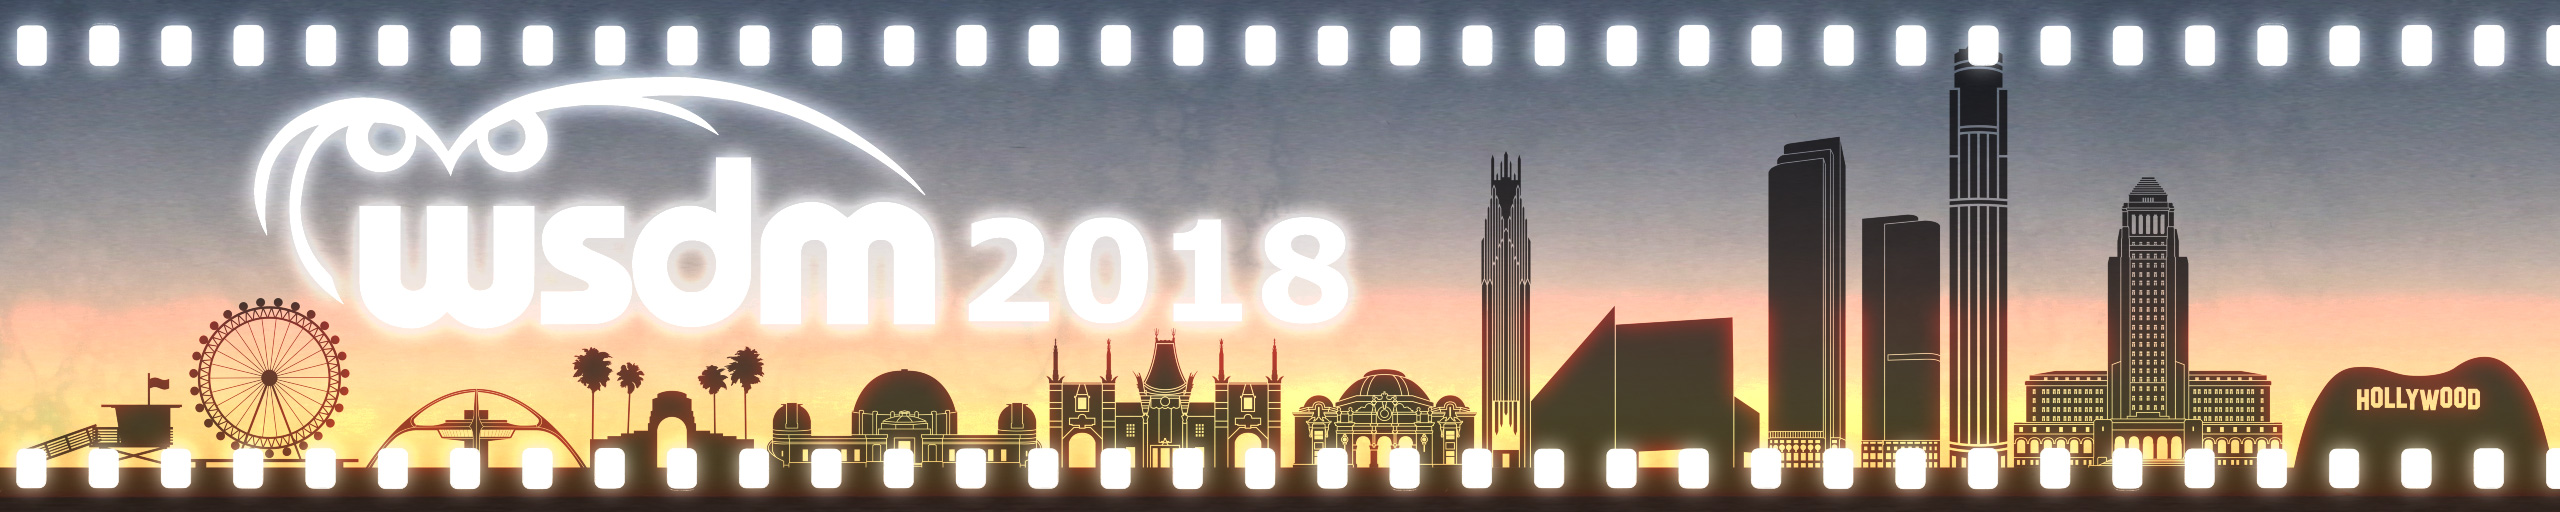


During our workshop we'll use data from WSDM - KKBox's Music Recommendation Challenge.
You can find our data here
https://www.kaggle.com/competitions/kkbox-music-recommendation-challenge/data

#### train.csv

- msno: user id
- song_id: song id
- source_system_tab: the name of the tab where the event was triggered. System  tabs are used to categorize KKBOX mobile apps functions. For example, tab my  library contains functions to manipulate the local storage, and tab search contains functions relating to search.
- source_screen_name: name of the layout a user sees.
- source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.
- target: this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise.


#### The songs info. 
songs.csv

- song_id
- song_length: in ms
- genre_ids: genre category. Some songs have multiple genres and they are separated by |
- artist_name
- composer
- lyricist
language

#### user information.
members.csv

- msno 
- city
- bd: age. Note: this column has outlier values, please use your judgement.
- gender
- registered_via: registration method
- registration_init_time: format %Y%m%d
- expiration_date: format %Y%m%d

#### Songs additional info
song_extra_info.csv

- song_id
- song name - the name of the song.
- isrc - International Standard Recording Code, theoretically can be used as an identity of a song. However, what worth to note is, ISRCs generated from providers have not been officially verified; therefore the information in ISRC, such as country code and reference year, can be misleading/incorrect. Multiple songs could share one ISRC since a single recording could be re-published several times.

### First of all:
- #### Mount your google drive to the colab notebook
- #### Create the root folder for the workshop materials
- #### Load the data from kaggle and place it into your "./data" directory

### Raw data loading

In [ ]:
directory = './data'
Archive('./kkbox-music-recommendation-challenge/train.csv.7z').extractall(directory)
Archive('./kkbox-music-recommendation-challenge/songs.csv.7z').extractall(directory)
Archive('./kkbox-music-recommendation-challenge/members.csv.7z').extractall(directory)
Archive('./kkbox-music-recommendation-challenge/song_extra_info.csv.7z').extractall(directory)

In [ ]:
cd ./data

/content/drive/MyDrive/Colab_Notebooks/datafest_22/data


In [ ]:
!ls

members.csv  song_extra_info.csv  songs.csv  train.csv


### Let's look at the data

Train data

In [ ]:
train = pd.read_csv("train.csv")
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [ ]:
train.shape

(7377418, 6)

In [ ]:
train.drop_duplicates().shape

(7377418, 6)

In [ ]:
train.isnull().sum() / train.shape[0] * 100

msno                  0.000000
song_id               0.000000
source_system_tab     0.336825
source_screen_name    5.622618
source_type           0.291959
target                0.000000
dtype: float64

In [ ]:
train.target.value_counts()

1    3714656
0    3662762
Name: target, dtype: int64

In [ ]:
train.source_system_tab.value_counts()

my library      3684730
discover        2179252
search           623286
radio            476701
listen with      212266
explore          167949
notification       6185
settings           2200
Name: source_system_tab, dtype: int64

In [ ]:
train.source_screen_name.value_counts()

Local playlist more     3228202
Online playlist more    1294689
Radio                    474467
Album more               420156
Search                   298487
Artist more              252429
Discover Feature         244246
Discover Chart           213658
Others profile more      201795
Discover Genre            82202
My library                75980
Explore                   72342
Unknown                   54170
Discover New              15955
Search Trends             13632
Search Home               13482
My library_Search          6451
Self profile more           212
Concert                      47
Payment                      12
Name: source_screen_name, dtype: int64

In [ ]:
train.source_type.value_counts()

local-library             2261399
online-playlist           1967924
local-playlist            1079503
radio                      483109
album                      477344
top-hits-for-artist        423614
song                       244722
song-based-playlist        210527
listen-with                192842
topic-article-playlist      11194
artist                       3038
my-daily-playlist             663
Name: source_type, dtype: int64

Songs info

In [ ]:
songs = pd.read_csv("songs.csv")
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [ ]:
songs.isnull().sum() / songs.shape[0] * 100

song_id         0.000000
song_length     0.000000
genre_ids       4.098558
artist_name     0.000000
composer       46.655257
lyricist       84.712409
language        0.000044
dtype: float64

In [ ]:
songs.genre_ids.value_counts()[:20]

465            567911
958            176349
2022           168870
1609           166457
2122           139938
1259           101485
921             67578
1152            48730
359             43601
786             42999
726             34969
139             34876
1011            34013
940             33490
1572|275        24338
1955            20980
691             19472
139|125|109     17613
873             17542
437             17212
Name: genre_ids, dtype: int64

In [ ]:
songs.language.value_counts()

 52.0    1336694
-1.0      639467
 3.0      106295
 17.0      92518
 24.0      41744
 31.0      39201
 10.0      15482
 45.0      14435
 59.0       8098
 38.0       2385
Name: language, dtype: int64

Songs extra info

In [ ]:
song_extra_info = pd.read_csv("song_extra_info.csv")
song_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [ ]:
song_extra_info.isnull().sum() / song_extra_info.shape[0] * 100

song_id    0.000000
name       0.000087
isrc       5.947288
dtype: float64

Users info

In [ ]:
members = pd.read_csv("members.csv")
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [ ]:
members.isnull().sum() / members.shape[0] * 100

msno                       0.000000
city                       0.000000
bd                         0.000000
gender                    57.849606
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

In [ ]:
members.gender.value_counts()

male      7405
female    7096
Name: gender, dtype: int64

In [ ]:
members.city.value_counts()

1     19445
13     3395
5      2634
4      1732
15     1525
22     1467
6       913
14      708
12      491
9       309
8       289
11      285
18      259
10      216
21      213
3       204
17      152
7        93
16       35
20       27
19       11
Name: city, dtype: int64

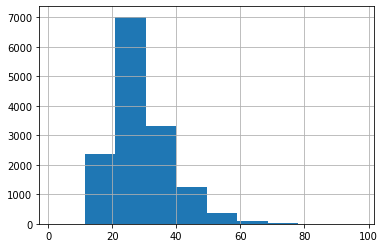

In [ ]:
members.bd[(members.bd < 100) & (members.bd > 0)].hist()

### Now, let's join train data and songs info

In [ ]:
train_extended = train.join(songs.set_index("song_id"), on="song_id")\
                      .join(song_extra_info.set_index("song_id"), on="song_id")
train_extended.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003


In [ ]:
train_extended.language.value_counts()

 3.0     4044643
 52.0    1864789
 31.0     656623
-1.0      308752
 17.0     245136
 10.0     171904
 24.0      78621
 59.0       4193
 45.0       2397
 38.0        210
Name: language, dtype: int64

In [ ]:
train_extended.genre_ids.value_counts()[:10]

465     3717690
458     1261208
921      350311
1609     315089
444      243600
1259     181713
2022     152545
359      109513
2122      71859
139       65827
Name: genre_ids, dtype: int64

In [ ]:
train_extended[train_extended.language==52.0].genre_ids.value_counts()[:10]

465          842929
1609         253304
1259         131859
921          111863
359          107048
2022          80389
139           61803
1616|1609     41873
2122          40864
1011          33324
Name: genre_ids, dtype: int64

### Finally, let's add some users info and get our final train dataset

In [ ]:
train_extended_final = train_extended.join(members.set_index("msno"), on="msno")
train_extended_final.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854,1,0,NaN,7,20120102,20171005
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,20110525,20170911
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,20110525,20170911
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063,13,24,female,9,20110525,20170911
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003,1,0,NaN,7,20120102,20171005


Null map

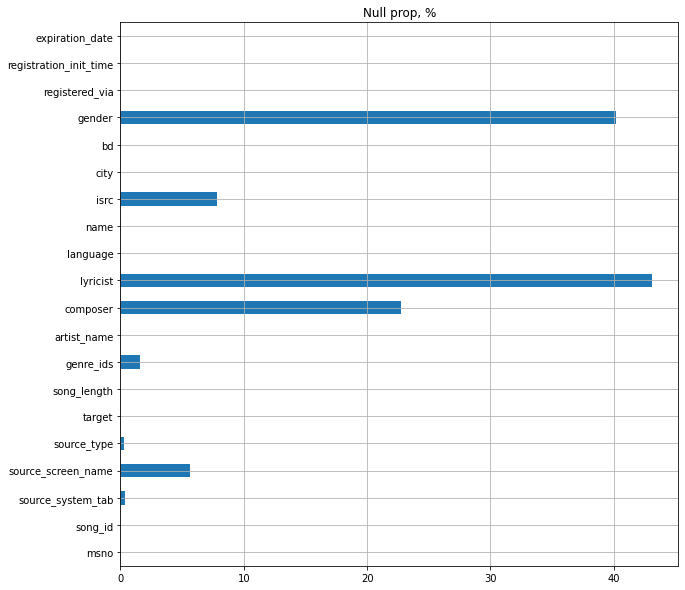

In [ ]:
(train_extended_final.isnull().sum() / train_extended_final.shape[0] * 100)\
                            .plot(kind="barh", grid=True, title="Null prop, %", figsize=(10,10));

In [ ]:
assert train_extended_final.shape[0] == train.shape[0]
assert train_extended_final.drop_duplicates().shape[0] == train.shape[0]

### Look at some distributions and stats

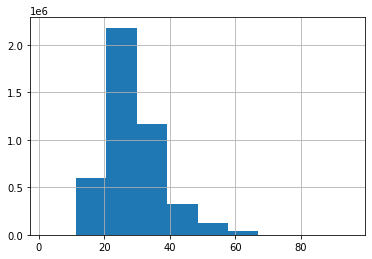

In [ ]:
train_extended_final.bd[(train_extended_final.bd < 100) & (train_extended_final.bd > 0)].hist()

In [ ]:
train_extended_final.gender.value_counts()

male      2297623
female    2118316
Name: gender, dtype: int64

In [ ]:
train_extended_final.city.value_counts()

1     2621293
13    1144863
5      830128
4      545820
15     484078
22     460330
6      275781
14     236639
12     147133
9       95237
8       85734
18      81780
11      71542
10      69158
21      67097
3       63555
17      44688
7       31621
16       7887
19       6961
20       6093
Name: city, dtype: int64

In [ ]:
train_extended_final[train_extended_final.city==1].language.value_counts()

 3.0     1377837
 52.0     675735
 31.0     247155
-1.0      117427
 17.0      97995
 10.0      74565
 24.0      27390
 59.0       1767
 45.0       1286
 38.0         84
Name: language, dtype: int64

In [ ]:
train_extended_final[train_extended_final.language==3.0].head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
11,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,8FGjC9W+7F8WjheGZPAwX9RH3+nWSO7DzjM6EB6naOI=,my library,Local playlist more,local-library,1,224597.0,465,嚴爵 (Yen-j),嚴爵,嚴爵,3.0,輕輕 (Lightly),TWK231507907,15,26,male,9,20111107,20180304
12,TJU0Gfvy7FB+r89bWovPKXTjuApTCiv3xg/tt5shR78=,u6/Pb7X4u7KU4gXrBgGqt8RlRrNNFLn03tLAHyxRxwA=,my library,NaN,top-hits-for-artist,0,280084.0,465,林俊傑 (JJ Lin),林俊傑,林怡鳳,3.0,手心的薔薇 (Beautiful) feat. G.E.M.鄧紫棋,TWA531480006,1,0,NaN,9,20150806,20170930
13,3g0bC24RD7QUeALY1IF/e8L6X3fHG298ZFIsCEG9T9Y=,TYhx9eqWklddkLQlApQ5MS9jJCO4H3JHdpISZ3kZSRE=,my library,Local playlist more,local-library,1,253492.0,458,周杰倫 (Jay Chou),周杰倫,周杰倫,3.0,給我一首歌的時間,TWK970801502,5,0,NaN,9,20110221,20170922
14,TJU0Gfvy7FB+r89bWovPKXTjuApTCiv3xg/tt5shR78=,IgMar/mVrJQ+ODFPytDf7jwQMmR09+slyZUdVylRFLc=,my library,Local playlist more,local-playlist,1,210364.0,465|458,林俊傑 (JJ Lin),JJ Lin,Lin Yi Feng,3.0,關鍵詞 (The Key),TWA531576504,1,0,NaN,9,20150806,20170930
16,TJU0Gfvy7FB+r89bWovPKXTjuApTCiv3xg/tt5shR78=,a4TbK5V15pj3YZUOGa9h2U3t0OsE+3aiFw41mNlcgcw=,my library,My library,local-playlist,1,248790.0,465,吳汶芳 (Fang Wu),吳汶芳,吳汶芳,3.0,孤獨的總和 (Accumulated Loneliness),TWA211328806,1,0,NaN,9,20150806,20170930


In [ ]:
train_extended_final[train_extended_final.language==52.0].head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854,1,0,NaN,7,20120102,20171005
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,20110525,20170911
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,20110525,20170911
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003,1,0,NaN,7,20120102,20171005
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1,247803.0,1259,Desiigner,Sidney Selby| Adnan Khan,NaN,52.0,Panda,USUM71601094,1,0,NaN,7,20120102,20171005


In [ ]:
train_extended_final[train_extended_final.city==1].genre_ids.value_counts()[:10]

465     1288294
458      442822
921      132561
1609     109988
444       94956
1259      62144
2022      55955
359       39618
2122      27116
437       23628
Name: genre_ids, dtype: int64

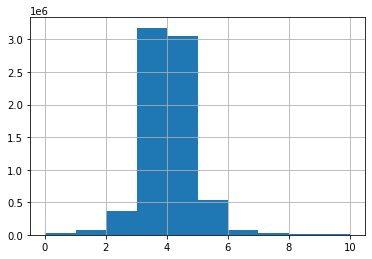

In [ ]:
(train_extended_final[train_extended_final.song_length < 10*60*1e3].song_length/(60*1e3)).hist()

In [ ]:
train_extended_final[train_extended_final.city==1].artist_name.value_counts()[:10]

Various Artists     111892
五月天 (Mayday)         63800
周杰倫 (Jay Chou)       62702
林俊傑 (JJ Lin)         41269
田馥甄 (Hebe)           37633
aMEI (張惠妹)           28310
陳奕迅 (Eason Chan)     26467
玖壹壹                  26354
G.E.M.鄧紫棋            23423
BIGBANG              22708
Name: artist_name, dtype: int64

In [ ]:
train_extended_final[(train_extended_final.city==1) & (train_extended_final.language==52.0)].artist_name.value_counts()[:10]

Various Artists     36957
Maroon 5            20289
The Chainsmokers    16782
Alan Walker         13646
Bruno Mars          11728
Justin Bieber       11200
Ed Sheeran           9734
CHARLIE PUTH         9400
Taylor Swift         9222
Adele                8076
Name: artist_name, dtype: int64

In [ ]:
train_extended_final[train_extended_final.city==1].lyricist.value_counts()[:20]

阿信                      53608
方文山                     43039
姚若龍                     20284
周杰倫                     18766
林夕                      16730
韋禮安                     12521
R-chord                 12314
吳青峰                     12098
八三夭 阿璞                  11561
葛大為                     10959
G.E.M. 鄧紫棋              10176
薛之謙                     10146
黃婷                       9838
徐世珍/吳輝福                  8925
吳克群                      8531
陳信延                      8364
廖建至 洪瑜鴻 陳皓宇              8298
施人誠                      7960
Eric Chou| Yi-Wei Wu     7393
周湯豪\崔惟楷                  7095
Name: lyricist, dtype: int64

In [ ]:
train_extended_final[(train_extended_final.city==1) & (train_extended_final.language==52.0)].lyricist.value_counts()[:20]

Andrew Taggart| Shaun Frank| Frederic Kennett| Ashley Frangipane| Isaac Slade| Joseph King                  5642
Alan Walker| Jesper Borgen| Anders Froen| Gunnar Greve                                                      5201
Alan Walker| Jesper Borgen| Anders Froen| Gunnar Greve| Jonnali Parmenius                                   4048
Andrew Taggart| Emily Warren| Scott Harris                                                                  3770
Alan Walker| Jesper Borgen| Anders Froen| Gunnar Greve| Tommy La Verdi| Magnus Bertelsen| Iselin Solheim    2993
Calvin Harris| Taylor Swift                                                                                 2703
Andrew Taggart| Sara Hejellstrom| Nirob Islam                                                               2665
Joshua Coleman| Jude Demorest| Tyrone Griffin Jr.| Alexander Izquierdo| Dallas Koehlke| Brian Lee           2223
Justin Timberlake| Max Martin| Shellback                                                        

In [ ]:
train_extended_final[train_extended_final.city==1].composer.value_counts()[:10]

周杰倫          68156
阿信           31951
林俊傑          27301
陳皓宇          22024
JJ Lin       17846
Eric Chou    16044
張簡君偉         15128
韋禮安          13684
八三夭 阿璞       11685
周湯豪          11621
Name: composer, dtype: int64

In [ ]:
train_extended_final[(train_extended_final.city==1) & (train_extended_final.language==52.0)].composer.value_counts()[:10]

Alan Walker| Jesper Borgen| Anders Froen| Gunnar Greve                                                                                                         6088
Andrew Taggart| Shaun Frank| Frederic Kennett| Ashley Frangipane| Isaac Slade| Joseph King                                                                     5642
Justin Hurwitz| Benj Pasek| Justin Paul                                                                                                                        4501
Justin Hurwitz                                                                                                                                                 4145
Alan Walker| Jesper Borgen| Anders Froen| Gunnar Greve| Jonnali Parmenius                                                                                      4048
Taylor Swift                                                                                                                                                   4025
Andrew Taggart| 

### All data saving

In [ ]:
train_extended_final.to_csv("data_all.csv", index=False)

In [ ]:
!pwd

/content/drive/MyDrive/Colab_Notebooks/datafest_22/data


In [ ]:
!ls

data_all.csv  members.csv  song_extra_info.csv	songs.csv  train.csv


### Clear our data folder from raw data

In [ ]:
!rm members.csv song_extra_info.csv songs.csv train.csv && ls

data_all.csv


### Stay tuned!